# Import packages

In [1]:
import pandas as pd
import numpy as np
import datetime
import json
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

# import data_1

In [2]:
pop_path = '/Users/chenhaoyi/JupyterNotebook/SummerProject/data/population_data/pop_data.xlsx'

pop_df = pd.read_excel(pop_path)
pop_df['Population'] = pop_df['Population'].apply(lambda x: x / 10000)
pop_df['population_density'] = pop_df['population_density'].apply(lambda x: x / 1000)
pop_df.rename(columns = {'Population':'Population(10K)'},inplace = True)


pop_df

,County,overweight or obese(%),underweight(%),Population(10K),land area(sq mi),population_density
0,Alachua,56.9,2.0,26.3148,875.02,0.300734
1,Baker,72.5,1.4,2.7785,585.23,0.047477
2,Bay,66.3,2.3,18.2482,758.46,0.240595
3,Bradford,70.6,2.7,2.6979,293.96,0.091778
4,Brevard,62.9,3.7,57.6808,1015.66,0.567914
5,Broward,63.0,1.6,190.9151,1209.78,1.578098
6,Calhoun,67.1,2.1,1.4444,567.33,0.025460
7,Charlotte,64.3,0.8,17.6954,680.28,0.260119
8,Citrus,64.7,1.2,14.3087,581.70,0.245981
9,Clay,67.8,2.1,20.7291,604.36,0.342993


# import data_2

In [3]:
with urlopen('https://opendata.arcgis.com/datasets/a7887f1940b34bf5a02c6f7f27a5cb2c_0.geojson') as f:
    data = json.load(f)

#make empty dictionary and dataframe
to_make_dataframe = {}
df = pd.DataFrame(columns = data['features'][0]['properties'].keys())

#retrieve data from geojson documentation
for j in range(len(data['features'])):
    for k in data['features'][j]['properties'].keys():
            to_make_dataframe[k] = data['features'][j]['properties'][k]
    df_temp = pd.DataFrame([to_make_dataframe])
    df = pd.concat([df,df_temp],axis = 0,ignore_index=True)

#pay attention to the last row, the countyname is unknown, so I drop the last row
df.drop([67], inplace = True)
df = df.sort_values(by = 'COUNTY')
#df.keys()


retrieve_list = ['County_1','C_RaceWhite', 'C_RaceBlack',
       'C_RaceOther', 'C_RaceUnknown', 'C_HispanicYES', 'C_HispanicNO',
       'C_HispanicUnk', 'C_HospYes_Res',
       'C_HospYes_NonRes', 'C_NonResDeaths', 'C_FLResDeaths', 'CasesAll',
       'C_Men', 'C_Women', 'C_FLRes', 'C_NotFLRes', 'C_FLResOut', 'T_NegRes',
       'T_NegNotFLRes', 'T_total', 'T_negative', 'T_positive', 'Deaths']

opendata_df = df.loc[:,retrieve_list].reset_index(drop = True).rename(columns = {'County_1': "County"})

for i in range(len(opendata_df.keys())):
               if i == 0:
                   pass
               else:
                   opendata_df.iloc[:,i] = opendata_df.iloc[:,i].astype('float')
               
                            
opendata_df

,County,C_RaceWhite,C_RaceBlack,C_RaceOther,C_RaceUnknown,C_HispanicYES,C_HispanicNO,C_HispanicUnk,C_HospYes_Res,C_HospYes_NonRes,C_NonResDeaths,C_FLResDeaths,CasesAll,C_Men,C_Women,C_FLRes,C_NotFLRes,C_FLResOut,T_NegRes,T_NegNotFLRes,T_total,T_negative,T_positive,Deaths
0,Alachua,583.0,339.0,263.0,483.0,272.0,880.0,516.0,96.0,5.0,0.0,12.0,1701.0,846.0,850.0,1668.0,33.0,0.0,44152.0,250.0,46114.0,44402.0,1701.0,12.0
1,Baker,79.0,18.0,5.0,8.0,2.0,94.0,14.0,18.0,0.0,0.0,4.0,110.0,62.0,45.0,110.0,0.0,0.0,1909.0,60.0,2079.0,1969.0,110.0,4.0
2,Bay,519.0,100.0,42.0,122.0,142.0,492.0,149.0,38.0,2.0,2.0,5.0,818.0,385.0,431.0,783.0,35.0,0.0,8561.0,21.0,9414.0,8582.0,818.0,5.0
3,Bradford,74.0,24.0,3.0,1.0,6.0,90.0,6.0,14.0,0.0,0.0,2.0,102.0,35.0,67.0,102.0,0.0,0.0,2762.0,2.0,2868.0,2764.0,102.0,2.0
4,Brevard,1537.0,167.0,181.0,803.0,435.0,1443.0,810.0,137.0,3.0,0.0,20.0,2705.0,1315.0,1383.0,2688.0,17.0,0.0,50653.0,6.0,53374.0,50659.0,2705.0,20.0
5,Broward,9469.0,6438.0,1741.0,4597.0,7598.0,10262.0,4385.0,2317.0,60.0,22.0,418.0,22595.0,11128.0,11351.0,22245.0,350.0,0.0,209439.0,1261.0,233421.0,210700.0,22595.0,418.0
6,Calhoun,71.0,12.0,7.0,11.0,9.0,76.0,16.0,10.0,0.0,0.0,6.0,101.0,32.0,68.0,101.0,0.0,0.0,904.0,0.0,1008.0,904.0,101.0,6.0
7,Charlotte,716.0,69.0,17.0,139.0,65.0,706.0,170.0,159.0,1.0,0.0,77.0,944.0,409.0,526.0,941.0,3.0,0.0,12800.0,16.0,13766.0,12816.0,944.0,77.0
8,Citrus,322.0,23.0,19.0,55.0,34.0,326.0,59.0,46.0,0.0,0.0,13.0,419.0,212.0,205.0,419.0,0.0,0.0,10748.0,6.0,11177.0,10754.0,419.0,13.0
9,Clay,476.0,181.0,83.0,330.0,90.0,620.0,360.0,111.0,0.0,0.0,34.0,1074.0,485.0,584.0,1070.0,4.0,0.0,18465.0,18.0,19571.0,18483.0,1074.0,34.0


# merge

In [4]:
pop_related_df = pd.merge(pop_df,opendata_df, how = 'left', on = 'County')
pop_related_df

,County,overweight or obese(%),underweight(%),Population(10K),land area(sq mi),population_density,C_RaceWhite,C_RaceBlack,C_RaceOther,C_RaceUnknown,C_HispanicYES,C_HispanicNO,C_HispanicUnk,C_HospYes_Res,C_HospYes_NonRes,C_NonResDeaths,C_FLResDeaths,CasesAll,C_Men,C_Women,C_FLRes,C_NotFLRes,C_FLResOut,T_NegRes,T_NegNotFLRes,T_total,T_negative,T_positive,Deaths
0,Alachua,56.9,2.0,26.3148,875.02,0.300734,583.0,339.0,263.0,483.0,272.0,880.0,516.0,96.0,5.0,0.0,12.0,1701.0,846.0,850.0,1668.0,33.0,0.0,44152.0,250.0,46114.0,44402.0,1701.0,12.0
1,Baker,72.5,1.4,2.7785,585.23,0.047477,79.0,18.0,5.0,8.0,2.0,94.0,14.0,18.0,0.0,0.0,4.0,110.0,62.0,45.0,110.0,0.0,0.0,1909.0,60.0,2079.0,1969.0,110.0,4.0
2,Bay,66.3,2.3,18.2482,758.46,0.240595,519.0,100.0,42.0,122.0,142.0,492.0,149.0,38.0,2.0,2.0,5.0,818.0,385.0,431.0,783.0,35.0,0.0,8561.0,21.0,9414.0,8582.0,818.0,5.0
3,Bradford,70.6,2.7,2.6979,293.96,0.091778,74.0,24.0,3.0,1.0,6.0,90.0,6.0,14.0,0.0,0.0,2.0,102.0,35.0,67.0,102.0,0.0,0.0,2762.0,2.0,2868.0,2764.0,102.0,2.0
4,Brevard,62.9,3.7,57.6808,1015.66,0.567914,1537.0,167.0,181.0,803.0,435.0,1443.0,810.0,137.0,3.0,0.0,20.0,2705.0,1315.0,1383.0,2688.0,17.0,0.0,50653.0,6.0,53374.0,50659.0,2705.0,20.0
5,Broward,63.0,1.6,190.9151,1209.78,1.578098,9469.0,6438.0,1741.0,4597.0,7598.0,10262.0,4385.0,2317.0,60.0,22.0,418.0,22595.0,11128.0,11351.0,22245.0,350.0,0.0,209439.0,1261.0,233421.0,210700.0,22595.0,418.0
6,Calhoun,67.1,2.1,1.4444,567.33,0.025460,71.0,12.0,7.0,11.0,9.0,76.0,16.0,10.0,0.0,0.0,6.0,101.0,32.0,68.0,101.0,0.0,0.0,904.0,0.0,1008.0,904.0,101.0,6.0
7,Charlotte,64.3,0.8,17.6954,680.28,0.260119,716.0,69.0,17.0,139.0,65.0,706.0,170.0,159.0,1.0,0.0,77.0,944.0,409.0,526.0,941.0,3.0,0.0,12800.0,16.0,13766.0,12816.0,944.0,77.0
8,Citrus,64.7,1.2,14.3087,581.70,0.245981,322.0,23.0,19.0,55.0,34.0,326.0,59.0,46.0,0.0,0.0,13.0,419.0,212.0,205.0,419.0,0.0,0.0,10748.0,6.0,11177.0,10754.0,419.0,13.0
9,Clay,67.8,2.1,20.7291,604.36,0.342993,476.0,181.0,83.0,330.0,90.0,620.0,360.0,111.0,0.0,0.0,34.0,1074.0,485.0,584.0,1070.0,4.0,0.0,18465.0,18.0,19571.0,18483.0,1074.0,34.0


# plot

## poplation

Text(0.5, 1.0, 'population(10K)')

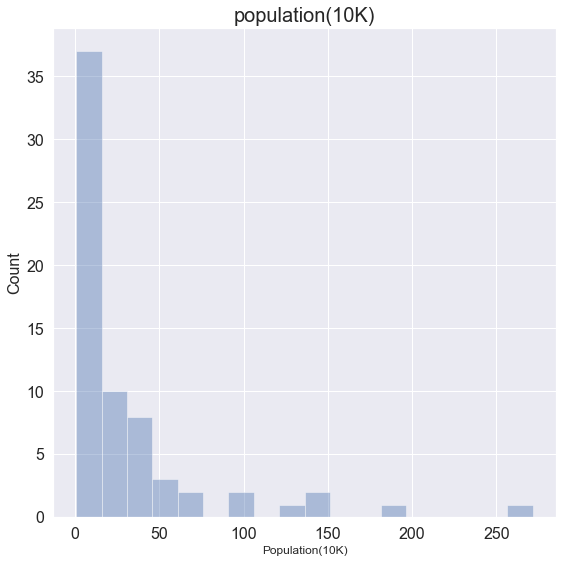

In [5]:
sns.set(style = 'darkgrid')
fig = plt.figure(figsize = (9,9))
sns.distplot(pop_related_df['Population(10K)'], kde = False)          
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=16)                    
plt.yticks(fontsize=16)                   
plt.title("population(10K)", fontsize=20)         

## population density

Text(0.5, 0, 'population_density(K/sq mi)')

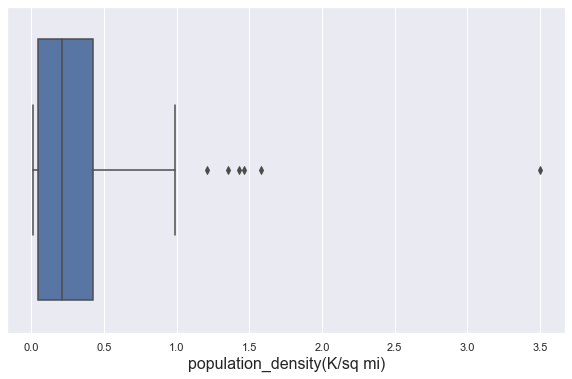

In [14]:
sns.set(style = 'darkgrid')
fig = plt.figure(figsize = (10,6))
sns.boxplot(x=pop_related_df["population_density"],data=pop_related_df)
plt.xlabel("population_density(K/sq mi)", fontsize=16)

## land area(sq mi)

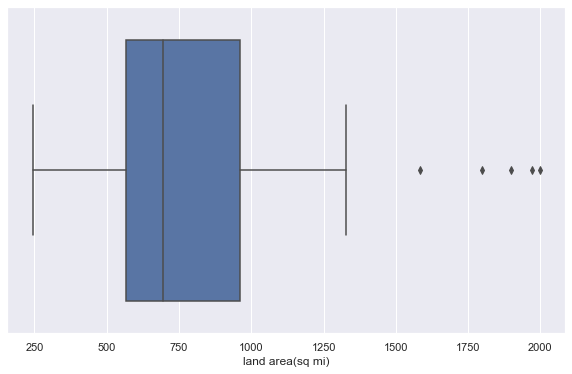

In [15]:
sns.set(style = 'darkgrid')
fig = plt.figure(figsize = (10,6))
sns.boxplot(x=pop_related_df["land area(sq mi)"],data=pop_related_df) 

## about race

Text(0.5, 1.0, 'C_RaceWhite')

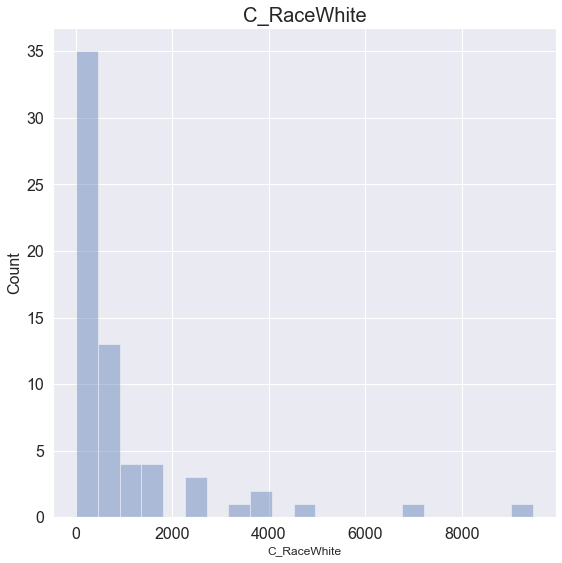

In [16]:
sns.set(style = 'darkgrid')
fig = plt.figure(figsize = (9,9))
sns.distplot(pop_related_df['C_RaceWhite'], kde = False)          
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=16)                    
plt.yticks(fontsize=16)                   
plt.title("C_RaceWhite", fontsize=20)       

Text(0.5, 1.0, 'C_RaceBlack')

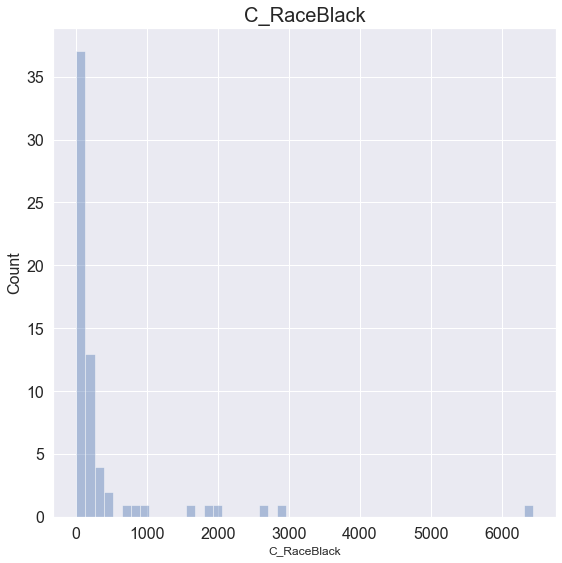

In [17]:
sns.set(style = 'darkgrid')
fig = plt.figure(figsize = (9,9))
sns.distplot(pop_related_df['C_RaceBlack'], kde = False)          
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=16)                    
plt.yticks(fontsize=16)                   
plt.title("C_RaceBlack", fontsize=20)    

Text(0.5, 1.0, 'C_RaceOther')

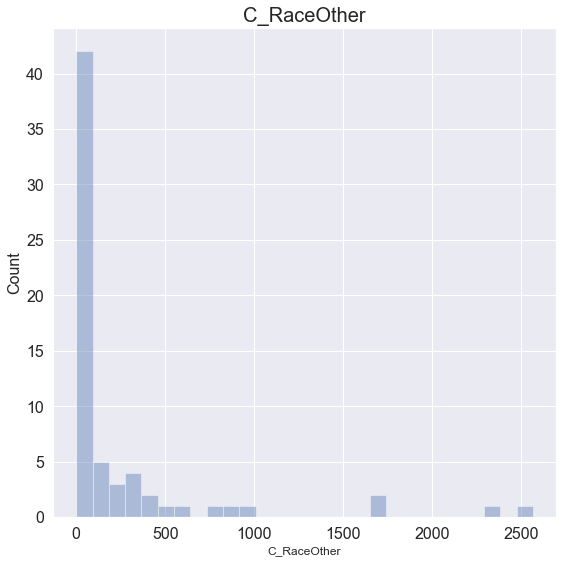

In [18]:
sns.set(style = 'darkgrid')
fig = plt.figure(figsize = (9,9))
sns.distplot(pop_related_df['C_RaceOther'], kde = False)          
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=16)                    
plt.yticks(fontsize=16)                   
plt.title("C_RaceOther", fontsize=20)    

Text(0.5, 1.0, 'C_RaceUnknown')

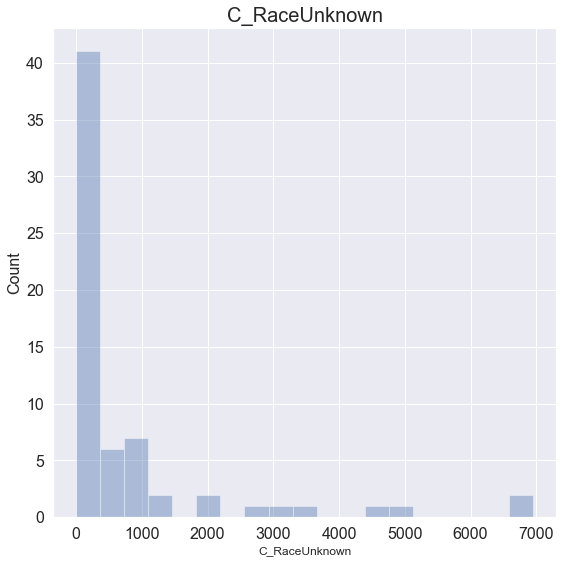

In [19]:
sns.set(style = 'darkgrid')
fig = plt.figure(figsize = (9,9))
sns.distplot(pop_related_df['C_RaceUnknown'], kde = False)          
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=16)                    
plt.yticks(fontsize=16)                   
plt.title("C_RaceUnknown", fontsize=20)    